<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий


# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 1. Обзор библиотеки Pandas</center>

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import absolute_import, division, print_function, unicode_literals

# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [2]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [3]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [4]:
print(salaries.Andrew == salaries["Andrew"])

True


In [5]:
salaries["Carl"] = np.nan

In [6]:
salaries.fillna(salaries.median(), inplace=True)

In [7]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Series поддерживает пропуски в данных.**

In [8]:
salaries.c = np.nan  # Series can contain missing values
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [9]:
print("Second element of salaries is", salaries[1], "\n")
# Smart indexing
print(salaries[:3], "\n")
print("There are", len(salaries[salaries > 0]), "positive elements in salaries\n")
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [10]:
df1 = pd.DataFrame(
    np.random.randn(5, 3),
    index=["o1", "o2", "o3", "o4", "o5"],
    columns=["f1", "f2", "f3"],
)
df1

,f1,f2,f3
o1,1.164106,-0.595003,0.979591
o2,0.357386,0.350873,-0.287098
o3,-1.030491,-0.685132,1.734618
o4,-1.442086,-0.290561,0.005821
o5,-0.869120,-0.282306,0.413756


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [11]:
df2 = pd.DataFrame(
    {"A": np.random.random(5), "B": ["a", "b", "c", "d", "e"], "C": np.arange(5) > 2}
)
df2

,A,B,C
0,0.829182,a,False
1,0.125108,b,False
2,0.214237,c,False
3,0.647686,d,True
4,0.379873,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [12]:
print("The element in position 3, B is", df2.at[3, "B"], "\n")
print(df2.loc[[1, 4], ["A", "B"]])

The element in position 3, B is d 

          A  B
1  0.125108  b
4  0.379873  e


**Изменение элементов и добавление новых:**

In [13]:
df2.at[2, "B"] = "f"
df2

,A,B,C
0,0.829182,a,False
1,0.125108,b,False
2,0.214237,f,False
3,0.647686,d,True
4,0.379873,e,True


In [14]:
df2.loc[5] = [3.1415, "c", False]
df2

,A,B,C
0,0.829182,a,False
1,0.125108,b,False
2,0.214237,f,False
3,0.647686,d,True
4,0.379873,e,True
5,3.141500,c,False


In [15]:
df1.columns = ["A", "B", "C"]
df3 = df1.append(df2)
df3

,A,B,C
o1,1.164106,-0.595003,0.979591
o2,0.357386,0.350873,-0.287098
o3,-1.030491,-0.685132,1.734618
o4,-1.442086,-0.290561,0.005821
o5,-0.869120,-0.282306,0.413756
0,0.829182,a,0.000000
1,0.125108,b,0.000000
2,0.214237,f,0.000000
3,0.647686,d,1.000000
4,0.379873,e,1.000000


#### Обработка пропущенных значений

In [16]:
df1.at["o2", "A"] = np.nan
df1.at["o4", "C"] = np.nan
df1

,A,B,C
o1,1.164106,-0.595003,0.979591
o2,NaN,0.350873,-0.287098
o3,-1.030491,-0.685132,1.734618
o4,-1.442086,-0.290561,NaN
o5,-0.869120,-0.282306,0.413756


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [17]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [18]:
df1.dropna(how="any")

,A,B,C
o1,1.164106,-0.595003,0.979591
o3,-1.030491,-0.685132,1.734618
o5,-0.869120,-0.282306,0.413756


**Пропуски можно заменить каким-то значением.**

In [19]:
df1.fillna(0)

,A,B,C
o1,1.164106,-0.595003,0.979591
o2,0.000000,0.350873,-0.287098
o3,-1.030491,-0.685132,1.734618
o4,-1.442086,-0.290561,0.000000
o5,-0.869120,-0.282306,0.413756


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/weatherAUS.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/subreddit_info.csv")

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Посмотрим на размер данных и названия признаков.**

In [22]:
print(df.shape)
print(df.columns.values)

(145460, 23)
['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


In [23]:
print(df2.shape)
print(df2.columns.values)

(3394, 6)
['subreddit' 'category_1' 'category_2' 'category_3' 'in_data'
 'reason_for_exclusion']


In [24]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [25]:
df2.head(10)

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
0,whatsthatbook,advice/question,book,NaN,True,NaN
1,CasualConversation,advice/question,broad,NaN,False,too_broad
2,Clairvoyantreadings,advice/question,broad,NaN,False,too_broad
3,DecidingToBeBetter,advice/question,broad,NaN,False,too_broad
4,HelpMeFind,advice/question,broad,NaN,False,too_broad
5,LifeProTips,advice/question,broad,NaN,False,too_broad
6,MLPLounge,advice/question,broad,NaN,False,too_broad
7,NoStupidQuestions,advice/question,broad,NaN,False,too_broad
8,RBI,advice/question,broad,NaN,False,too_broad
9,TooAfraidToAsk,advice/question,broad,NaN,False,too_broad


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [26]:
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [27]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [28]:
df2.describe()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
count,3394,3394,3362,536,3394,2381
unique,3394,46,1422,238,2,373
top,GalaxyS6,video_game,broad,city/province,False,too_broad
freq,1,709,366,138,2381,542


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [29]:
df.sort_values(by="MaxTemp", ascending=False).head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106316,2011-01-25,Woomera,25.1,48.1,0.0,22.4,12.8,WSW,85.0,NNE,NW,37.0,43.0,21.0,7.0,1003.4,1000.4,3.0,2.0,33.2,46.1,No,No
14942,2017-02-12,Moree,27.8,47.3,0.0,NaN,NaN,SSW,67.0,NNE,NW,13.0,28.0,30.0,10.0,1003.9,998.1,7.0,1.0,32.9,46.7,No,No
13806,2014-01-03,Moree,28.3,47.3,0.0,16.0,12.0,WSW,61.0,N,WNW,33.0,33.0,36.0,5.0,1001.9,995.9,1.0,6.0,33.4,45.8,No,No
30041,2017-02-11,Richmond,22.3,47.0,0.0,NaN,NaN,SW,41.0,NE,S,9.0,11.0,84.0,18.0,1008.0,1001.3,4.0,NaN,25.8,44.7,No,No
27032,2017-02-11,Penrith,23.3,46.9,0.0,NaN,NaN,W,50.0,N,WNW,7.0,30.0,85.0,14.0,NaN,NaN,NaN,NaN,25.3,46.2,No,No


In [30]:
df2.sort_values(by="category_2", ascending=True).head()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
2515,13ReasonsWhy,tv_show,13 reasons why,NaN,True,NaN
2141,AdobeIllustrator,software,2d graphics editing,adobe illustrator,True,NaN
2142,GIMP,software,2d graphics editing,gimp,False,fewer posts than r/AdobeIllustrator which shar...
2146,Maya,software,3d graphics editing,maya,False,fewer posts than r/blender which shares topic
2147,Vue,software,3d graphics editing,vue,False,fewer posts than r/blender which shares topic


In [31]:
df.sort_values(by=["Rainfall", "MaxTemp"], ascending=[True, False]).head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106316,2011-01-25,Woomera,25.1,48.1,0.0,22.4,12.8,WSW,85.0,NNE,NW,37.0,43.0,21.0,7.0,1003.4,1000.4,3.0,2.0,33.2,46.1,No,No
13806,2014-01-03,Moree,28.3,47.3,0.0,16.0,12.0,WSW,61.0,N,WNW,33.0,33.0,36.0,5.0,1001.9,995.9,1.0,6.0,33.4,45.8,No,No
14942,2017-02-12,Moree,27.8,47.3,0.0,NaN,NaN,SSW,67.0,NNE,NW,13.0,28.0,30.0,10.0,1003.9,998.1,7.0,1.0,32.9,46.7,No,No
30041,2017-02-11,Richmond,22.3,47.0,0.0,NaN,NaN,SW,41.0,NE,S,9.0,11.0,84.0,18.0,1008.0,1001.3,4.0,NaN,25.8,44.7,No,No
27032,2017-02-11,Penrith,23.3,46.9,0.0,NaN,NaN,W,50.0,N,WNW,7.0,30.0,85.0,14.0,NaN,NaN,NaN,NaN,25.3,46.2,No,No


In [32]:
df2.sort_values(by=["category_2", "in_data"], ascending=[True, False]).head()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
2515,13ReasonsWhy,tv_show,13 reasons why,NaN,True,NaN
2141,AdobeIllustrator,software,2d graphics editing,adobe illustrator,True,NaN
2142,GIMP,software,2d graphics editing,gimp,False,fewer posts than r/AdobeIllustrator which shar...
2143,blender,software,3d graphics editing,blender,True,NaN
2144,blenderhelp,software,3d graphics editing,blender,False,fewer posts than r/blender which shares topic


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [33]:
df["Rainfall"].mean()

2.360918149917032

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **На сколько средняя заработная плата мужчин выше средней заработной платы среди женщин?**

In [38]:
df[df["MaxTemp"] >= 23.9].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No


In [39]:
df2[df2["in_data"] == True].head()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
0,whatsthatbook,advice/question,book,NaN,True,NaN
25,theydidthemath,advice/question,calculations,NaN,True,NaN
26,datarecovery,advice/question,data recovery,NaN,True,NaN
27,declutter,advice/question,declutter,NaN,True,NaN
30,productivity,advice/question,discipline,NaN,True,NaN


In [41]:
df[(df["MaxTemp"] >= 23.9) & (df["MinTemp"] <= 20.1)].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No


In [51]:
df2[(df2["in_data"] == True) & (df2["category_2"] == "book")].head()

,subreddit,category_1,category_2,category_3,in_data,reason_for_exclusion
0,whatsthatbook,advice/question,book,NaN,True,NaN


In [52]:
df[(df["MaxTemp"] >= 34.6)]["Evaporation"].mean() - df[(df["MaxTemp"] <= 14.4)]["Evaporation"].mean()

9.110224065008452

**Какова максимальная температура в дни с западным ветром скоростью больше 25.1 м/с и дождём?**

In [54]:
df[(df["WindGustDir"] == 'W') & (df["RainToday"] == "Yes") & (df["WindGustSpeed"] > 25.1)]["MaxTemp"].max()

42.0

**Применение функции к каждому столбцу:**

In [ ]:
df.apply(np.mean)

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [56]:
df["Evaporation"].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [57]:
df2["reason_for_exclusion"].describe()

count          2381
unique          373
top       too_broad
freq            542
Name: reason_for_exclusion, dtype: object

In [60]:
g = df.groupby("MaxTemp")
for (i, sub_df) in g:
    print(sub_df["MinTemp"].mean(), sub_df["WindSpeed3pm"].mean())

-7.5 17.0
-5.8 15.0
-6.5 24.0
-5.9 9.0
-6.5 19.0
-5.5 22.0
-3.3 17.0
-5.5 15.0
nan 20.0
-5.25 21.5
-4.5 33.0
-4.8 nan
-3.6666666666666665 20.333333333333332
-4.225 32.75
-5.85 nan
-4.133333333333333 11.666666666666666
-4.65 16.5
-5.46 25.75
-5.15 20.5
-4.55 16.25
-5.16 9.75
-4.8500000000000005 26.666666666666668
-3.9 24.5
-4.42 15.5
-3.25 22.0
-4.516666666666666 18.4
-4.7749999999999995 18.0
-2.966666666666667 23.75
-1.6 19.666666666666668
-3.9666666666666663 21.5
-3.5625 22.0
-3.1 15.8
-3.122222222222222 20.0
-3.216666666666667 15.928571428571429
-3.8428571428571425 17.466666666666665
-2.5833333333333335 17.5
-4.155555555555555 18.444444444444443
-2.3000000000000003 18.666666666666668
-2.5 16.5
-2.655555555555555 17.444444444444443
-6.7 nan
-2.625 17.5
-2.9571428571428577 22.285714285714285
-2.6142857142857143 19.142857142857142
-2.5375 20.25
-2.84 21.6
-2.3000000000000003 21.833333333333332
-2.409090909090909 20.6
-2.4166666666666665 14.666666666666666
-2.1333333333333333 15.22222222

**Обращение к конкретной группе:**

In [61]:
d1 = g.get_group(1)
d1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
52297,2009-07-24,MountGinini,-4.4,1.0,2.2,NaN,NaN,W,56.0,NaN,W,0.0,20.0,88.0,86.0,NaN,NaN,NaN,NaN,-3.2,0.8,Yes,No
52379,2009-10-14,MountGinini,-0.9,1.0,15.2,NaN,NaN,WNW,80.0,NaN,W,0.0,33.0,98.0,98.0,NaN,NaN,NaN,NaN,-0.8,0.6,Yes,Yes
52635,2010-06-27,MountGinini,-5.2,1.0,0.0,NaN,NaN,SSE,30.0,SE,W,15.0,9.0,36.0,35.0,NaN,NaN,NaN,NaN,-3.2,0.7,No,No
52954,2011-06-11,MountGinini,-2.9,1.0,0.2,NaN,NaN,ESE,41.0,ESE,NaN,7.0,NaN,99.0,NaN,NaN,NaN,NaN,NaN,-2.2,NaN,No,No
52962,2011-06-19,MountGinini,-2.0,1.0,NaN,NaN,NaN,W,54.0,NaN,WSW,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
53396,2012-08-26,MountGinini,NaN,1.0,NaN,NaN,NaN,SW,44.0,NaN,WSW,NaN,19.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,0.1,NaN,Yes
54345,2015-05-31,MountGinini,-2.2,1.0,0.0,NaN,NaN,W,59.0,SW,W,28.0,20.0,97.0,94.0,NaN,NaN,NaN,NaN,-0.8,0.4,No,Yes
54385,2015-07-10,MountGinini,-0.7,1.0,9.2,NaN,NaN,NNW,54.0,NW,WNW,22.0,13.0,98.0,98.0,NaN,NaN,NaN,NaN,-0.3,0.1,Yes,Yes


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

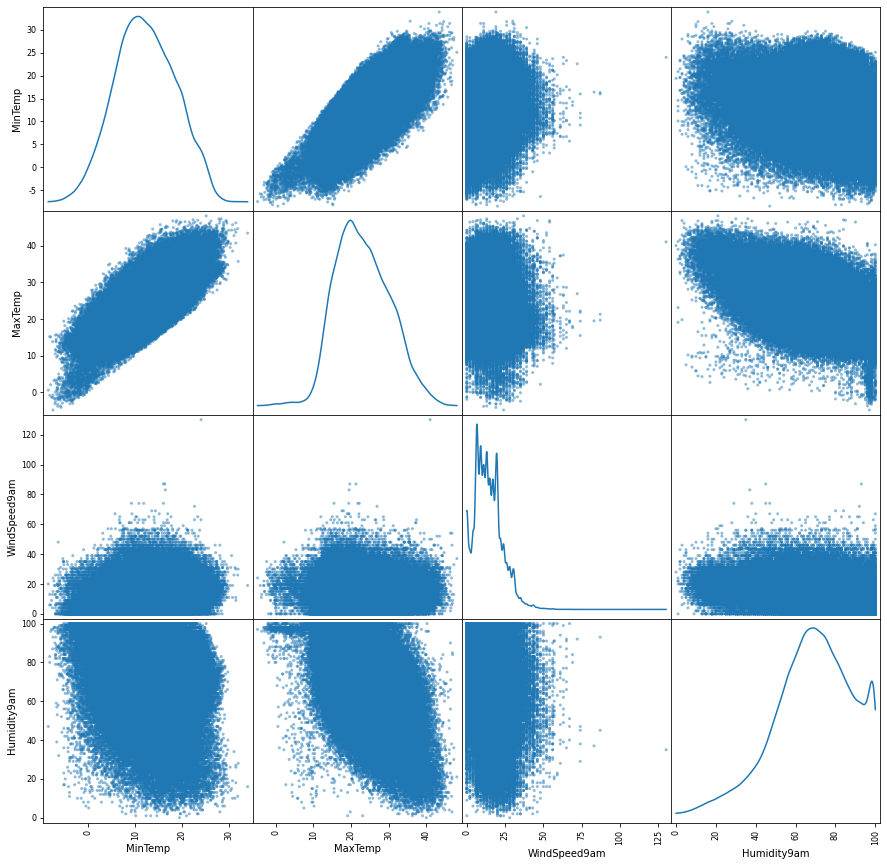

In [62]:
pd.plotting.scatter_matrix(
    df[["MinTemp", "MaxTemp", "WindSpeed9am", "Humidity9am"]], figsize=(15, 15), diagonal="kde"
)
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

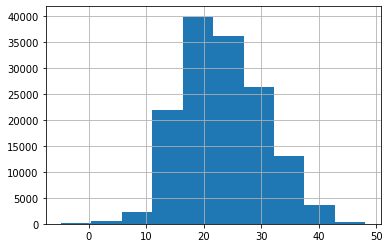

In [63]:
df["MaxTemp"].hist()

**Или сразу для всех:**

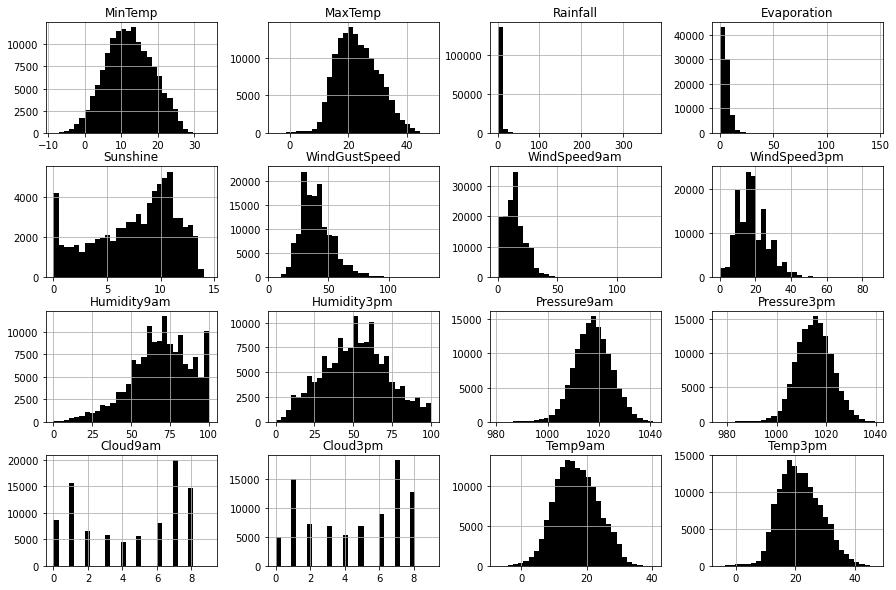

In [64]:
df.hist(color="k", bins=30, figsize=(15, 10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

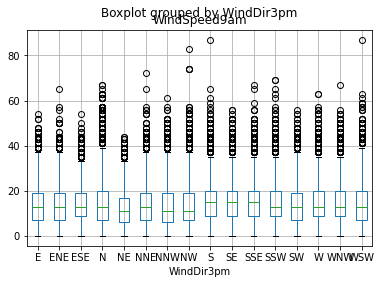

In [67]:
df.boxplot(column="WindSpeed9am", by="WindDir3pm")
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

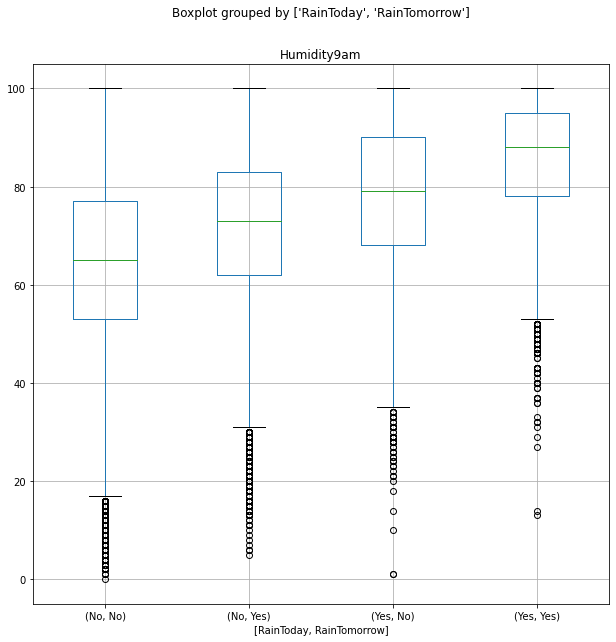

In [70]:
df.boxplot(column="Humidity9am", by=["RainToday", "RainTomorrow"], figsize=(10, 10))
plt.show()